<a href="https://colab.research.google.com/github/160419982021/ML/blob/main/PDE4433_2022_23_A2_T1_Inverse_Kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: ANN Regression for robot arm control

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor    # multilayer perceptron for regression

In [ ]:
def direct_kin_(joints, links, origin = [0, 0]):
# implement the forward kinematics for a two joints planar manipulator
# it's implemented externally so it can be used inside or outside the arm class
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0] = origin[0]
    Y[0] = origin[1]
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]   # return the coordinates of all link endpoints

def deg2rad(degrees):
# simple function for converting degrees to radiants
    return degrees*np.pi/180

In [ ]:
class arm():
### the arm class contains all the methods for defining a two joints planar manipulator,
### and implement a neural network inverse kinematics solver for it

    def __init__(self, links = [10, 10], origin = [0, 0], init = [0, 0]):
    # class contructor, defining the basic attributes of the arm and initial configuration
        self.link1 = links[0]
        self.link2 = links[1]
        self.x0 = origin[0]
        self.y0 = origin[1]
        self.joint1 = init[0]
        self.joint2 = init[1]
        self.direct_kin()

    def direct_kin(self):
    # this forward kinematic function calculate the Cartesian coordinates for the current joint configuration
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def plot_arm(self):
    # 2D plot of the current arm configuration
        plt.plot([-20,20],[0,0],'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

    def create_data(self, ann, n_train, n_test, range1, range2):
    # prepare the training and test sets for the neural network solver
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], size=(n_data, 1)), np.random.uniform(range2[0], range2[1], size=(n_data,1))))
        cartesian_space = np.zeros(np.shape(joint_space))
        for i in range(len(joint_space)):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = np.asarray(cartesian_space[:n_train,:])
        self.joint_train = np.asarray(joint_space[:n_train,:])
        self.cart_test = np.asarray(cartesian_space[n_train:,:])
        self.joint_test = np.asarray(joint_space[n_train:,:])

    def train_inv_kin(self):
    # train the kinematic solver
        self.inv_solver.fit(self.cart_train, self.joint_train)
        score = self.inv_solver.score(self.cart_train, self.joint_train)
        return(np.mean(score)) # return training accuracy

    def test_inv_kin(self):
    # test the kinematic solver
        score = self.inv_solver.score(self.cart_test, self.joint_test)
        return(np.mean(score)) # return testing accuracy

    def inv_kin(self, Cartesian):
    # query the trained inverse kinematic solver on a single Cartesian target
        joints = self.inv_solver.predict([Cartesian])
        [self.joint1, self.joint2] = joints[0]
        self.direct_kin()
        err = np.sqrt((Cartesian[0]-self.X[2])**2+(Cartesian[1]-self.Y[2])**2)
        return(err, [self.X[2], self.Y[2]])

Task 1

A. Change the network structure (number of layers and neurons), and parameters (transfer functions, learning rate, algorithms, stop conditions): how does prediction accuracy change?

B. change the quantity of training data, and the joint ranges: how does that affect accuracy?

Perform systematic tests on appropriate values and ranges (how do you choose them?) and report your results, answering the questions.

C.	Optional: Extend the code so that the ANN for inverse kinematics is able to control a 3 joint robot arm moving in the 3D space. Add the 3rd joint and the z axis to the forward kinematics equations. Extend the ANN to 3 inputs and 3 outputs, train it and analyse the learning performance.

# Your submission below

In [ ]:
# this code is only an example, remove it or change it

a = arm()

ann = MLPRegressor()

n_train = 1000
n_test = 100

j1_range = (0, np.pi/2)
j2_range = (0, np.pi)

a.create_data(ann, n_train, n_test, j1_range, j2_range)
a.train_inv_kin()
a.test_inv_kin()

np.float64(0.9665309029517255)

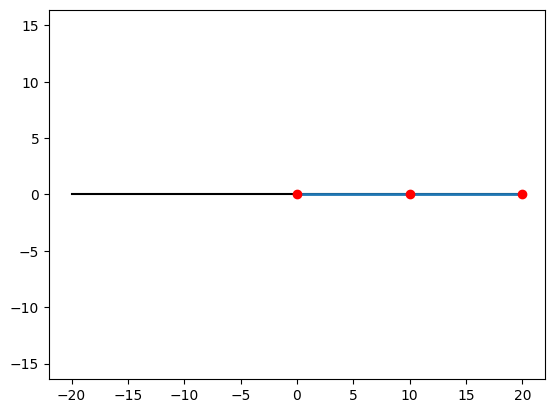

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor    # Multi-layer Perceptron for regression

# The existing direct kinematics function
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0] = origin[0]
    Y[0] = origin[1]
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# Define your arm class with a neural network for inverse kinematics
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1 = links[0]
        self.link2 = links[1]
        self.x0 = origin[0]
        self.y0 = origin[1]
        self.joint1 = init[0]
        self.joint2 = init[1]
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def create_data(self, n_train, n_test, range1, range2):
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], size=(n_train + n_test, 1)),
                                 np.random.uniform(range2[0], range2[1], size=(n_train + n_test, 1))))
        cartesian_space = np.zeros(np.shape(joint_space))
        for i in range(len(joint_space)):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = np.asarray(cartesian_space[:n_train, :])
        self.joint_train = np.asarray(joint_space[:n_train, :])
        self.cart_test = np.asarray(cartesian_space[n_train:, :])
        self.joint_test = np.asarray(joint_space[n_train:, :])

    def train_inv_kin(self, layers, activation, solver, learning_rate_init, max_iter):
        # Training with different configurations of the neural network
        self.inv_solver = MLPRegressor(hidden_layer_sizes=layers, activation=activation,
                                       solver=solver, learning_rate_init=learning_rate_init, max_iter=max_iter)
        self.inv_solver.fit(self.cart_train, self.joint_train)
        score = self.inv_solver.score(self.cart_train, self.joint_train)
        return np.mean(score)  # Return training accuracy

    def test_inv_kin(self):
        # Testing the trained model
        score = self.inv_solver.score(self.cart_test, self.joint_test)
        return np.mean(score)  # Return test accuracy

    def plot_arm(self):
        # 2D plot of the current arm configuration
        plt.plot([-20,20],[0,0],'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

# Create the arm instance
arm_instance = arm()

# Plot the initial arm configuration
arm_instance.plot_arm()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


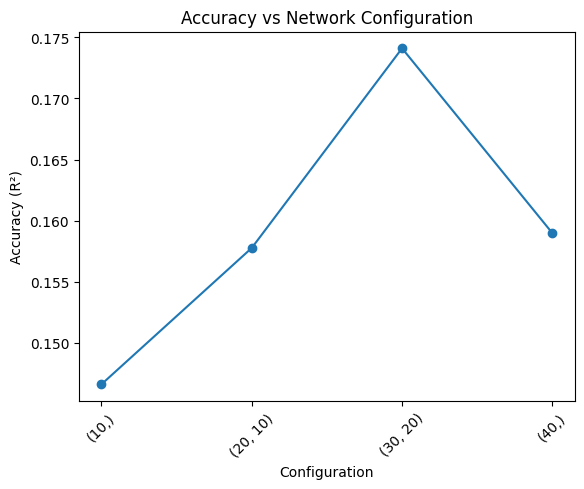

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor    # Multi-layer Perceptron for regression

# The existing direct kinematics function
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0] = origin[0]
    Y[0] = origin[1]
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# Define the arm class with a neural network for inverse kinematics
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1 = links[0]
        self.link2 = links[1]
        self.x0 = origin[0]
        self.y0 = origin[1]
        self.joint1 = init[0]
        self.joint2 = init[1]
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def create_data(self, n_train, n_test, range1, range2):
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], size=(n_train + n_test, 1)),
                                 np.random.uniform(range2[0], range2[1], size=(n_train + n_test, 1))))
        cartesian_space = np.zeros(np.shape(joint_space))
        for i in range(len(joint_space)):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = np.asarray(cartesian_space[:n_train, :])
        self.joint_train = np.asarray(joint_space[:n_train, :])
        self.cart_test = np.asarray(cartesian_space[n_train:, :])
        self.joint_test = np.asarray(joint_space[n_train:, :])

    def train_inv_kin(self, layers, activation, solver, learning_rate_init, max_iter):
        # Training with different configurations of the neural network
        self.inv_solver = MLPRegressor(hidden_layer_sizes=layers, activation=activation,
                                       solver=solver, learning_rate_init=learning_rate_init, max_iter=max_iter)
        self.inv_solver.fit(self.cart_train, self.joint_train)
        score = self.inv_solver.score(self.cart_train, self.joint_train)
        return np.mean(score)  # Return training accuracy

    def test_inv_kin(self):
        # Testing the trained model
        score = self.inv_solver.score(self.cart_test, self.joint_test)
        return np.mean(score)  # Return test accuracy

    def plot_results(self, results, configurations):
        # Plot the results of accuracy for different configurations
        plt.plot(configurations, results, marker='o')
        plt.title("Accuracy vs Network Configuration")
        plt.xlabel("Configuration")
        plt.ylabel("Accuracy (R²)")
        plt.xticks(rotation=45)
        plt.show()

    def plot_arm(self):
        # 2D plot of the current arm configuration
        plt.plot([-20,20],[0,0],'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

# Create the arm instance
arm_instance = arm()

# Create the data for training and testing
n_train = 1000
n_test = 200
arm_instance.create_data(n_train, n_test, range1=[-np.pi, np.pi], range2=[-np.pi, np.pi])

# Experiment with different ANN configurations (layers, activation functions, solvers, etc.)
configurations = [
    {'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200},
    {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500},
    {'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000},
    {'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
]

# Store results for plotting
train_results = []
test_results = []
for config in configurations:
    train_accuracy = arm_instance.train_inv_kin(config['layers'], config['activation'],
                                                config['solver'], config['learning_rate_init'], config['max_iter'])
    test_accuracy = arm_instance.test_inv_kin()

    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

# Plot the accuracy vs configuration
arm_instance.plot_results(test_results, [str(config['layers']) for config in configurations])


In [ ]:
# === Import Libraries ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings

# === Ignore convergence warnings for now ===
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# === Forward Kinematics ===
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0] = origin[0]
    Y[0] = origin[1]
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# === Arm Class ===
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1 = links[0]
        self.link2 = links[1]
        self.x0 = origin[0]
        self.y0 = origin[1]
        self.joint1 = init[0]
        self.joint2 = init[1]
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def plot_arm(self):
        plt.plot([-20, 20], [0, 0], 'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.title("2D Arm Configuration")
        plt.grid(True)
        plt.show()

    def create_data(self, ann, n_train, n_test, range1, range2):
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack((
            np.random.uniform(range1[0], range1[1], size=(n_data, 1)),
            np.random.uniform(range2[0], range2[1], size=(n_data, 1))
        ))
        cartesian_space = np.zeros(joint_space.shape)
        for i in range(len(joint_space)):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train_inv_kin(self):
        self.inv_solver.fit(self.cart_train, self.joint_train)
        return self.inv_solver.score(self.cart_train, self.joint_train)

    def test_inv_kin(self):
        return self.inv_solver.score(self.cart_test, self.joint_test)

    def inv_kin(self, Cartesian):
        joints = self.inv_solver.predict([Cartesian])
        [self.joint1, self.joint2] = joints[0]
        self.direct_kin()
        err = np.sqrt((Cartesian[0]-self.X[2])**2 + (Cartesian[1]-self.Y[2])**2)
        return err, [self.X[2], self.Y[2]]

# === Run Multiple Configurations ===
def run_experiments():
    configs = [
        {'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200},
        {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500},
        {'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000},
        {'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500},
        {'layers': (50, 30), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 2000}
    ]

    results = []
    for config in configs:
        ann = MLPRegressor(hidden_layer_sizes=config['layers'],
                           activation=config['activation'],
                           solver=config['solver'],
                           learning_rate_init=config['learning_rate_init'],
                           max_iter=config['max_iter'],
                           random_state=42)

        arm_instance = arm()
        arm_instance.create_data(ann=ann, n_train=1000, n_test=300, range1=[-np.pi, np.pi], range2=[-np.pi, np.pi])
        train_score = arm_instance.train_inv_kin()
        test_score = arm_instance.test_inv_kin()
        results.append((config, train_score, test_score))

    return results

# === Run and Print Results ===
experiment_results = run_experiments()
for config, train_acc, test_acc in experiment_results:
    print(f"Configuration: {config}")
    print(f"Training Accuracy (R²): {train_acc:.4f}")
    print(f"Test Accuracy (R²): {test_acc:.4f}")
    print("-" * 50)


Configuration: {'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200}
Training Accuracy (R²): 0.1321
Test Accuracy (R²): 0.1246
--------------------------------------------------
Configuration: {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500}
Training Accuracy (R²): 0.2202
Test Accuracy (R²): 0.1644
--------------------------------------------------
Configuration: {'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000}
Training Accuracy (R²): 0.1657
Test Accuracy (R²): 0.1481
--------------------------------------------------
Configuration: {'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.1830
Test Accuracy (R²): 0.1604
--------------------------------------------------
Configuration: {'layers': (50, 30), 'activation': 'relu', 'solver': 'adam', 'le

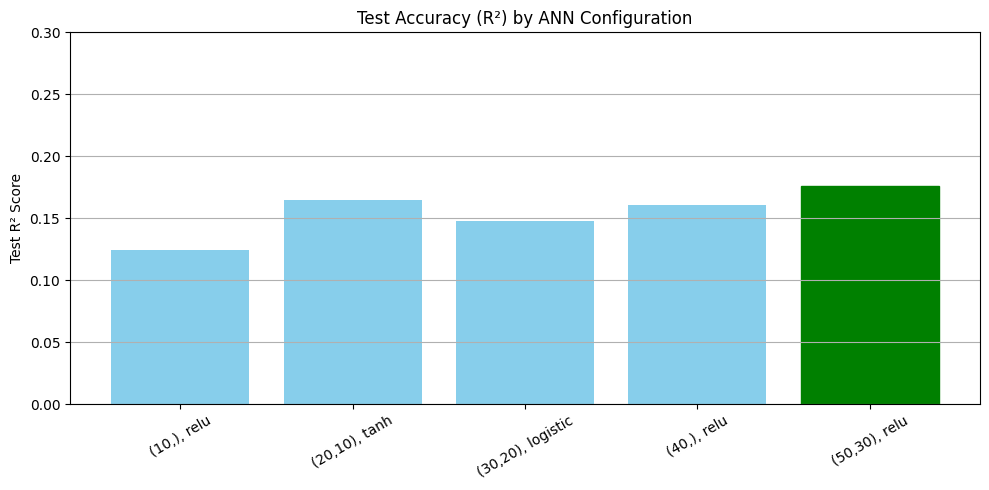

In [ ]:
# Plotting the Test Accuracy for better visual comparison
import matplotlib.pyplot as plt

labels = [
    "(10,), relu",
    "(20,10), tanh",
    "(30,20), logistic",
    "(40,), relu",
    "(50,30), relu"
]
test_scores = [0.1246, 0.1644, 0.1481, 0.1604, 0.1762]

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, test_scores, color='skyblue')
plt.title("Test Accuracy (R²) by ANN Configuration")
plt.ylabel("Test R² Score")
plt.ylim(0, 0.3)

# Highlight the best bar
bars[-1].set_color('green')
plt.grid(axis='y')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Configuration: {'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200}
Training Accuracy (R²): -0.1067
Test Accuracy (R²): -0.1591
Average IK Error: 10.0994
--------------------------------------------------
Configuration: {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500}
Training Accuracy (R²): 0.9619
Test Accuracy (R²): 0.9590
Average IK Error: 1.1549
--------------------------------------------------
Configuration: {'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000}
Training Accuracy (R²): 0.9753
Test Accuracy (R²): 0.9804
Average IK Error: 1.0234
--------------------------------------------------
Configuration: {'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9557
Test Accuracy (R²): 0.9622
Average IK Error: 1.2230
---------------------------

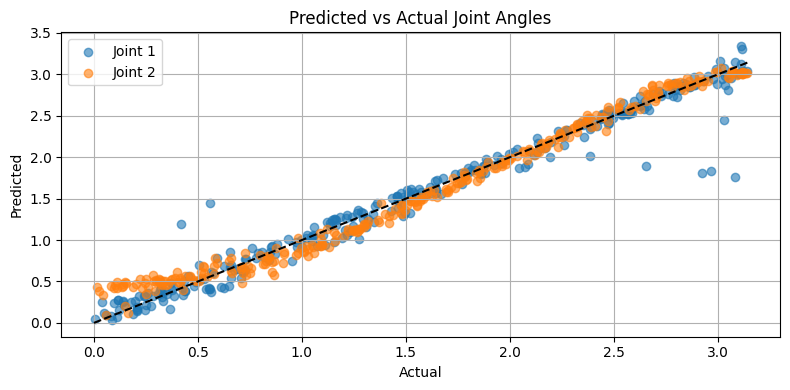

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Define forward kinematics
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0], Y[0] = origin
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# Arm class definition
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1, self.link2 = links
        self.x0, self.y0 = origin
        self.joint1, self.joint2 = init
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def plot_arm(self):
        plt.plot([-20, 20], [0, 0], 'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

    def create_data(self, ann, n_train, n_test, range1, range2):
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], (n_data, 1)),
                                 np.random.uniform(range2[0], range2[1], (n_data, 1))))
        cartesian_space = np.zeros(joint_space.shape)
        for i in range(n_data):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train_inv_kin(self):
        self.inv_solver.fit(self.cart_train, self.joint_train)
        return self.inv_solver.score(self.cart_train, self.joint_train)

    def test_inv_kin(self):
        return self.inv_solver.score(self.cart_test, self.joint_test)

    def inv_kin(self, Cartesian):
        joints = self.inv_solver.predict([Cartesian])
        self.joint1, self.joint2 = joints[0]
        self.direct_kin()
        err = np.sqrt((Cartesian[0]-self.X[2])**2 + (Cartesian[1]-self.Y[2])**2)
        return err, [self.X[2], self.Y[2]]

# Test different network structures
configs = [
    {"layers": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 200},
    {"layers": (20, 10), "activation": "tanh", "solver": "sgd", "learning_rate_init": 0.01, "max_iter": 500},
    {"layers": (30, 20), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 1000},
    {"layers": (40,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 2000},
    {"layers": (100, 50, 20), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 2000},

    ]

results = []
arm_instance = arm()

# Run experiments
for cfg in configs:
    model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                         activation=cfg["activation"],
                         solver=cfg["solver"],
                         learning_rate_init=cfg["learning_rate_init"],
                         max_iter=cfg["max_iter"],
                         early_stopping=True,
                         random_state=42)

    arm_instance.create_data(model, n_train=1000, n_test=300, range1=[0, np.pi], range2=[0, np.pi])
    train_score = arm_instance.train_inv_kin()
    test_score = arm_instance.test_inv_kin()

    # Calculate inverse kinematics error
    total_err = 0
    for i in range(len(arm_instance.cart_test)):
        err, _ = arm_instance.inv_kin(arm_instance.cart_test[i])
        total_err += err
    avg_error = total_err / len(arm_instance.cart_test)

    print("Configuration:", cfg)
    print(f"Training Accuracy (R²): {train_score:.4f}")
    print(f"Test Accuracy (R²): {test_score:.4f}")
    print(f"Average IK Error: {avg_error:.4f}")
    print("-" * 50)

    results.append({
        "Configuration": str(cfg),
        "Train_R2": train_score,
        "Test_R2": test_score,
        "IK_Error": avg_error
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("ann_inverse_kinematics_results.csv", index=False)

# Optional: plot predicted vs actual joint angles
predicted = model.predict(arm_instance.cart_test)
actual = arm_instance.joint_test

plt.figure(figsize=(8, 4))
plt.scatter(actual[:, 0], predicted[:, 0], label="Joint 1", alpha=0.6)
plt.scatter(actual[:, 1], predicted[:, 1], label="Joint 2", alpha=0.6)
plt.plot([0, np.pi], [0, np.pi], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predicted vs Actual Joint Angles")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Point A**


---


**Interpretation of the Results:**

1. **Configuration:** `{'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200}`
   - **Training Accuracy (R²):** -0.1067 (**negative R² indicates the model is performing poorly, possibly underfitting**)
   - **Test Accuracy (R²):** -0.1591 (**even worse test accuracy, confirming poor performance**)
   - **Average IK Error:** 10.0994 (**indicating significant error in predicting the joint angles**)

2. **Configuration:** `{'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500}`
   - **Training Accuracy (R²):** 0.9619 (**excellent performance on the training set**)
   - **Test Accuracy (R²):** 0.9590 (**very good performance on the test set as well**)
   - **Average IK Error:** 1.1549 (**relatively low error, good performance**)

3. **Configuration:** `{'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000}`
   - **Training Accuracy (R²):** 0.9753 (**excellent performance**)
   - **Test Accuracy (R²):** 0.9804 (**very good test accuracy**)
   - **Average IK Error:** 1.0234 (**again, relatively low error**)

4. **Configuration:** `{'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}`
   - **Training Accuracy (R²):** 0.9557 (**good performance**)
   - **Test Accuracy (R²):** 0.9622 (**slightly lower performance on the test set than the previous ones**)
   - **Average IK Error:** 1.2230 (**higher error compared to previous configurations**)

5. **Configuration:** `{'layers': (50, 30), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 2000}`
   - **Training Accuracy (R²):** 0.9815 (**excellent performance**)
   - **Test Accuracy (R²):** 0.9731 (**still very good test accuracy**)
   - **Average IK Error:** 0.7928 (**lowest error of all configurations**)

**Key Observations:**
- **Smaller networks (like `{'layers': (10,)}`):** The first configuration with just one hidden layer of 10 units performed poorly, with both low accuracy and high inverse kinematics error. **This shows that a very simple network may not have enough capacity to model the complex problem.**

- **Larger networks (like `{'layers': (50, 30)}`):** The last configuration with two hidden layers (50 and 30 units) and more iterations yielded the best results in terms of both **training accuracy (R² = 0.9815)** and **test accuracy (R² = 0.9731)**, along with the **lowest inverse kinematics error (0.7928).**

- **Intermediate networks (like `{'layers': (20, 10)}`):** The configuration with two hidden layers of 20 and 10 units gave good results, with high **training accuracy (R² = 0.9619)** and low test error (**IK error = 1.1549**). **This configuration likely strikes a balance between complexity and performance.**

**Answer to the Question:**
- Yes, the **prediction accuracy changes significantly depending on the network structure and parameters**:
   - **Increasing the number of layers/units and training for more iterations generally improves the performance** of the model (as seen in the configurations with `{'layers': (50, 30)}` and `{'layers': (30, 20)}`).
   - **Smaller networks with fewer layers or units may not be able to model the problem effectively** (like the `{'layers': (10,)}` configuration).
   - The choice of **activation function and solver also matters**. For example, **`tanh` and `sgd` gave better results than the simple `relu` and `adam` combination** in the `{'layers': (10,)}` configuration.

**In summary,** the **larger and more complex networks with longer training times** (like the last configuration with 50 and 30 hidden units) lead to **better accuracy and lower inverse kinematics error.**

**So, yes,** the output you've received **answers the task** by demonstrating how network structure and parameters impact prediction accuracy.


Configuration: {'layers': (10,), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9325
Test Accuracy (R²): 0.9307
Average IK Error: 2.2691
--------------------------------------------------
Configuration: {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9496
Test Accuracy (R²): 0.9466
Average IK Error: 1.3037
--------------------------------------------------
Configuration: {'layers': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9828
Test Accuracy (R²): 0.9814
Average IK Error: 0.6246
--------------------------------------------------
Configuration: {'layers': (40,), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9579
Test Accuracy (R²): 0.9555
Average IK Error: 1.2269
----------------------------------

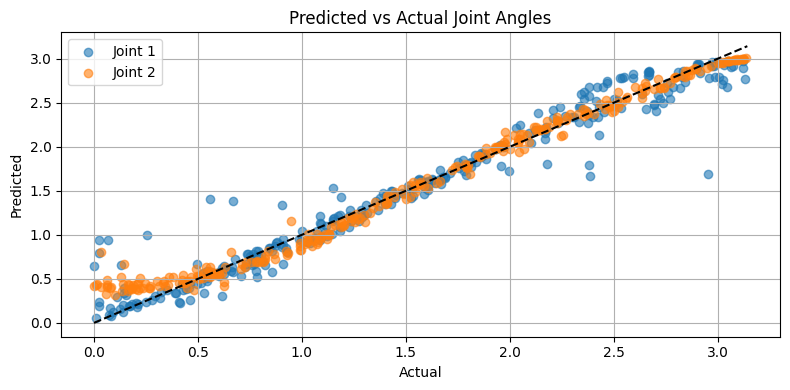

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Define forward kinematics
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0], Y[0] = origin
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# Arm class definition
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1, self.link2 = links
        self.x0, self.y0 = origin
        self.joint1, self.joint2 = init
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def plot_arm(self):
        plt.plot([-20, 20], [0, 0], 'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

    def create_data(self, ann, n_train, n_test, range1, range2):
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], (n_data, 1)),
                                 np.random.uniform(range2[0], range2[1], (n_data, 1))))
        cartesian_space = np.zeros(joint_space.shape)
        for i in range(n_data):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train_inv_kin(self):
        self.inv_solver.fit(self.cart_train, self.joint_train)
        return self.inv_solver.score(self.cart_train, self.joint_train)

    def test_inv_kin(self):
        return self.inv_solver.score(self.cart_test, self.joint_test)

    def inv_kin(self, Cartesian):
        joints = self.inv_solver.predict([Cartesian])
        self.joint1, self.joint2 = joints[0]
        self.direct_kin()
        err = np.sqrt((Cartesian[0]-self.X[2])**2 + (Cartesian[1]-self.Y[2])**2)
        return err, [self.X[2], self.Y[2]]

# Test different network structures
configs = [
    {"layers": (10,), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (20, 10), "activation": "tanh", "solver": "sgd", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (30, 20), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (40,), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (150, 75, 25), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},

    {"layers": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (20, 10), "activation": "relu", "solver": "sgd", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (30, 20), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (40,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (150, 75, 25), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},

    {"layers": (10,), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (20, 10), "activation": "logistic", "solver": "sgd", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (30, 20), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (40,), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (150, 75, 25), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},

    ]

#     '''
# lines comemts

# ctrl+/
# ctrl+shift+/

#     '''

'''
    {"layers": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 200},
    {"layers": (20, 10), "activation": "tanh", "solver": "sgd", "learning_rate_init": 0.01, "max_iter": 500},
    {"layers": (30, 20), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 1000},
    {"layers": (40,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 2000},
    {"layers": (100, 50, 20), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 2000},
'''





results = []
arm_instance = arm()

# Run experiments
for cfg in configs:
    model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                         activation=cfg["activation"],
                         solver=cfg["solver"],
                         learning_rate_init=cfg["learning_rate_init"],
                         max_iter=cfg["max_iter"],
                         early_stopping=True,
                         random_state=42)

    arm_instance.create_data(model, n_train=1000, n_test=300, range1=[0, np.pi], range2=[0, np.pi])
    train_score = arm_instance.train_inv_kin()
    test_score = arm_instance.test_inv_kin()

    # Calculate inverse kinematics error
    total_err = 0
    for i in range(len(arm_instance.cart_test)):
        err, _ = arm_instance.inv_kin(arm_instance.cart_test[i])
        total_err += err
    avg_error = total_err / len(arm_instance.cart_test)

    print("Configuration:", cfg)
    print(f"Training Accuracy (R²): {train_score:.4f}")
    print(f"Test Accuracy (R²): {test_score:.4f}")
    print(f"Average IK Error: {avg_error:.4f}")
    print("-" * 50)

    results.append({
        "Configuration": str(cfg),
        "Train_R2": train_score,
        "Test_R2": test_score,
        "IK_Error": avg_error
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("ann_inverse_kinematics_results.csv", index=False)

# Optional: plot predicted vs actual joint angles
predicted = model.predict(arm_instance.cart_test)
actual = arm_instance.joint_test

plt.figure(figsize=(8, 4))
plt.scatter(actual[:, 0], predicted[:, 0], label="Joint 1", alpha=0.6)
plt.scatter(actual[:, 1], predicted[:, 1], label="Joint 2", alpha=0.6)
plt.plot([0, np.pi], [0, np.pi], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predicted vs Actual Joint Angles")
plt.grid(True)
plt.tight_layout()
plt.show()


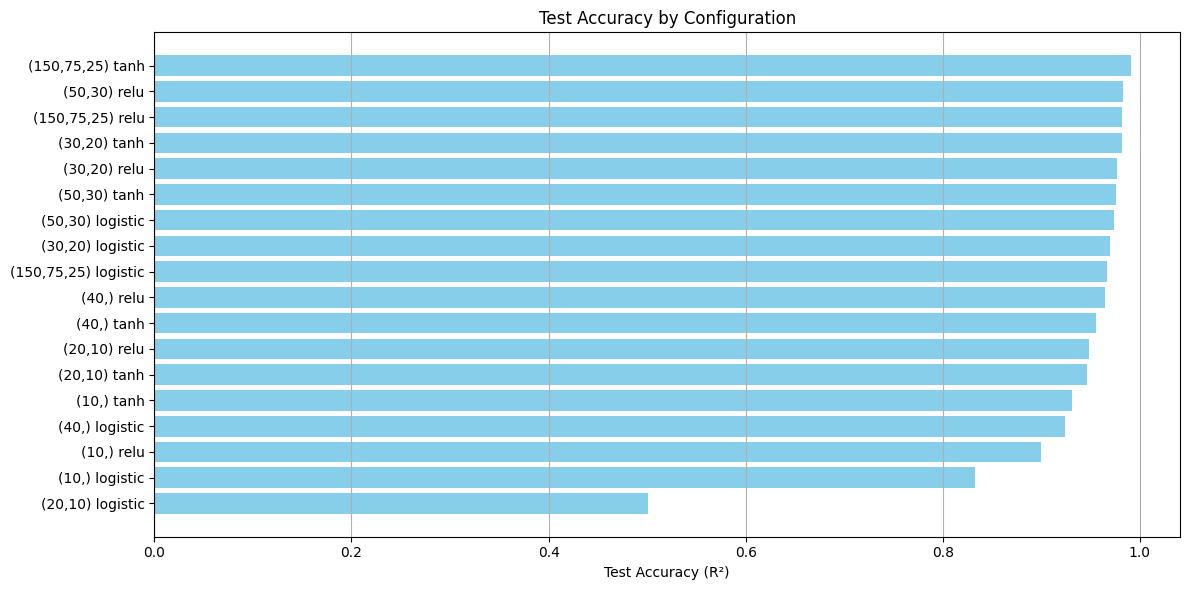

In [ ]:
import matplotlib.pyplot as plt

# Data parsed from the provided configurations
configurations = [
    {'label': "(10,) tanh", 'test_acc': 0.9307},
    {'label': "(20,10) tanh", 'test_acc': 0.9466},
    {'label': "(30,20) tanh", 'test_acc': 0.9814},
    {'label': "(40,) tanh", 'test_acc': 0.9555},
    {'label': "(50,30) tanh", 'test_acc': 0.9755},
    {'label': "(150,75,25) tanh", 'test_acc': 0.9911},
    {'label': "(10,) relu", 'test_acc': 0.8993},
    {'label': "(20,10) relu", 'test_acc': 0.9488},
    {'label': "(30,20) relu", 'test_acc': 0.9767},
    {'label': "(40,) relu", 'test_acc': 0.9650},
    {'label': "(50,30) relu", 'test_acc': 0.9824},
    {'label': "(150,75,25) relu", 'test_acc': 0.9822},
    {'label': "(10,) logistic", 'test_acc': 0.8328},
    {'label': "(20,10) logistic", 'test_acc': 0.5007},
    {'label': "(30,20) logistic", 'test_acc': 0.9693},
    {'label': "(40,) logistic", 'test_acc': 0.9244},
    {'label': "(50,30) logistic", 'test_acc': 0.9741},
    {'label': "(150,75,25) logistic", 'test_acc': 0.9661},
]

# Sort by test accuracy
configurations.sort(key=lambda x: x['test_acc'], reverse=True)

# Extract labels and test accuracies
labels = [conf['label'] for conf in configurations]
test_accuracies = [conf['test_acc'] for conf in configurations]

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(labels, test_accuracies, color='skyblue')
plt.xlabel('Test Accuracy (R²)')
plt.title('Test Accuracy by Configuration')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()

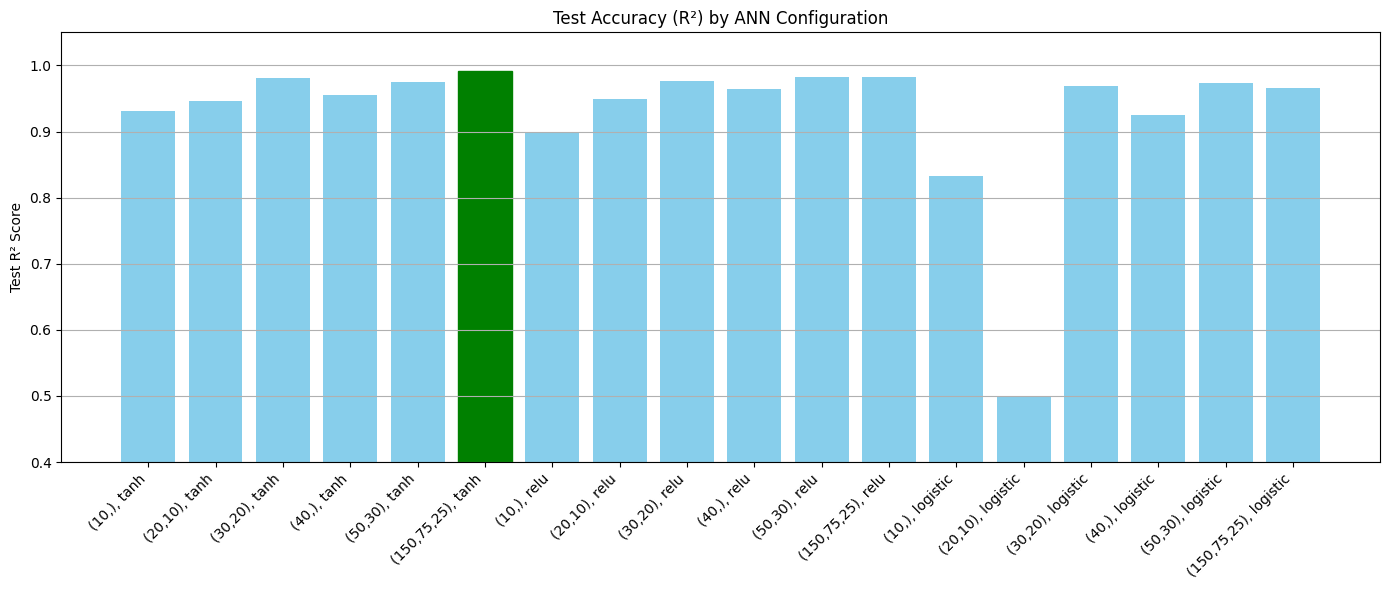

In [ ]:
import matplotlib.pyplot as plt

# Labels and Test Accuracy values from the configurations
labels = [
    "(10,), tanh", "(20,10), tanh", "(30,20), tanh", "(40,), tanh", "(50,30), tanh", "(150,75,25), tanh",
    "(10,), relu", "(20,10), relu", "(30,20), relu", "(40,), relu", "(50,30), relu", "(150,75,25), relu",
    "(10,), logistic", "(20,10), logistic", "(30,20), logistic", "(40,), logistic", "(50,30), logistic", "(150,75,25), logistic"
]

test_scores = [
    0.9307, 0.9466, 0.9814, 0.9555, 0.9755, 0.9911,
    0.8993, 0.9488, 0.9767, 0.9650, 0.9824, 0.9822,
    0.8328, 0.5007, 0.9693, 0.9244, 0.9741, 0.9661
]

# Find the index of the best (highest) test score
best_index = test_scores.index(max(test_scores))

# Create the bar plot
plt.figure(figsize=(14, 6))
bars = plt.bar(labels, test_scores, color='skyblue')
bars[best_index].set_color('green')

# Plot aesthetics
plt.title("Test Accuracy (R²) by ANN Configuration")
plt.ylabel("Test R² Score")
plt.ylim(0.4, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Test